# ***Decision Tree***

## ***Universidad Central***

## ***Maestría en analítica de datos***

## ***Métodos estadísticos para analítica de datos.***
## ***Docente: Luis Andrés Campos Maldonado.***

In [1]:
## Librerias a usar,
import pandas                 as pd
import numpy                  as np
import matplotlib.pyplot      as plt
import seaborn                as sns
import statsmodels.api        as sm
import warnings
##
from sklearn.model_selection  import train_test_split
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch
from sklearn.datasets         import load_iris
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV
from sklearn.metrics          import roc_curve, auc, accuracy_score,roc_auc_score 
from sklearn.metrics          import plot_confusion_matrix, confusion_matrix
from sklearn.linear_model     import LogisticRegression
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
##
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.
from graphviz                 import Source                         ## Para plotear los árboles.
##
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15,6)
warnings.filterwarnings("ignore")
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/"

## ***Decision Trees***

<center>

<img src="https://ichi.pro/assets/images/max/724/1*OLJWt9hD2zTS-x3gRhYuqg.png" witdh=20>

</center>

### ***Introducción***

El enfoque de clasificación y regresión vía árboles (CART) fue desarrollado por Breiman et al. (1984). Como su nombre indica, esta técnica de machine learning toma una serie de decisiones en forma de árbol. Los nodos intermedios (las ramas) representan soluciones y los nodos finales (las hojas) nos dan la predicción que buscamos.

Este algoritmo es principalmente usado en problemas de clasificación y por supuesto las variables pueden ser continuas o categóricas. Este algoritmo divide el espacio de predicitores (variables independientes) en regiones distintas y no sobrepuestas.

Este algoritmo es uno de los algoritmos de machine learning más populares. Utiliza una estructura similar a la de un árbol y sus posibles combinaciones para resolver un problema concreto. Este puede utilizarse tanto para la clasificación como para la regresión.

Un árbol de decisión es una estructura que incluye un ***nodo raíz, ramas y nodos hoja***. Cada nodo interno denota una prueba sobre un atributo, cada rama denota el resultado de una prueba y cada nodo hoja contiene una etiqueta de clase. El nodo superior del árbol es el nodo raíz.

El algoritmo del árbol de decisión se basa en algunas suposiciones:

1. Al principio, todo el conjunto de entrenamiento se considera la raíz.
2. Los valores de las características deben ser categóricos. Si los valores son continuos, se discretizan antes de construir el modelo.
3. Los registros se distribuyen recursivamente sobre la base de los valores de los atributos.
4. El orden de colocación de los atributos como raíz o nodo interno del árbol se realiza utilizando algún enfoque estadístico.

### ***Terminología importante.***

- En un algoritmo de Árbol de Decisión, hay una estructura similar a un árbol en la que cada nodo interno representa una prueba sobre un atributo, cada rama representa el resultado de la prueba y cada nodo hoja representa una etiqueta de clase. Los caminos que van del nodo raíz al nodo hoja representan las reglas de clasificación.

- Podemos ver que el algoritmo de árbol de decisión contiene cierta terminología. Los términos que intervienen en el algoritmo de árbol de decisión son los siguientes


#### ***Nodo raíz:***

Representa toda la población o muestra. Esta se divide a su vez en dos o más conjuntos homogéneos.


#### ***División:***

Es un proceso de división de un nodo en dos o más subnodos.


#### ***Nodo de decisión***

Cuando un subnodo se divide en otros subnodos, se denomina nodo de decisión.


#### ***Nodo hoja/terminal***

Los nodos que no se dividen se denominan nodos Hoja o nodo terminal.


#### ***Poda***

Cuando eliminamos los subnodos de un nodo de decisión, este proceso se llama poda. Es el proceso contrario a la división.


#### ***Rama/Subárbol***

Una sub-sección de un árbol completo se llama rama o sub-árbol.


#### ***Nodo padre e hijo***

Un nodo dividido en subnodos se llama nodo padre de subnodos, donde los subnodos son los hijos de un nodo padre.

### ***Intuición del algoritmo del árbol de decisión***



La intuición del algoritmo del Árbol de Decisión es la siguiente:


1.	Para cada atributo del conjunto de datos, el algoritmo Decision-Tree forma un nodo. El atributo más importante se coloca en el nodo raíz. 

2.	Para evaluar la tarea en cuestión, empezamos en el nodo raíz y bajamos por el árbol siguiendo el nodo correspondiente que cumple nuestra condición o decisión.

3.	Este proceso continúa hasta llegar a un nodo hoja. Éste contiene la predicción o el resultado del Árbol de Decisión.


### ***Medidas de selección de atributos***

El reto principal en la implementación del Árbol de Decisión es identificar los atributos que consideramos como el nodo raíz y cada nivel. Este proceso se conoce como selección de atributos. Hay diferentes medidas de selección de atributos para identificar el atributo que puede ser considerado como el nodo raíz en cada nivel.


Hay dos medidas populares de selección de atributos.


- ***Ganancia de información.***
 
- ***Índice de Gini.***


Al utilizar la ganancia de información como criterio, asumimos que los atributos son categóricos y para el índice de Gini se asume que los atributos son continuos. Estas medidas de selección de atributos se describen a continuación.

### ***Ganancia de información***



Utilizando la ganancia de información como criterio, intentamos estimar la información que contiene cada atributo. Para entender el concepto de Ganancia de Información, necesitamos conocer otro concepto llamado **Entropía**. 

#### ***Entropía***

- La entropía mide la impureza del conjunto de datos. 

- En Física y Matemáticas, la entropía se refiere a la aleatoriedad o incertidumbre de una variable aleatoria X. 

- En la teoría de la información, se refiere a la impureza en un grupo de ejemplos. **La ganancia de información** es la disminución de la entropía. La ganancia de información calcula la diferencia entre la entropía antes de la división y la entropía media después de la división del conjunto de datos basado en los valores de los atributos dados. 



$$Entropy= \sum_{i=1}^{C}-p_{i}\log_2(p_i)$$

donde, **$c$** es el número de clases y **$p_i$** es la probabilidad asociada a la i-ésima clase. 


- Ejemplo 1: El nodo N tiene 10 ejemplos de clase $C_1$ y 30 ejemplos de clase $C_2$ la entropía pureza es:

- Ejemplo 2: El nodo N tiene 30 ejemplos de clase $C_1$ y 30 ejemplos de clase $C_2$ la entropía impureza es:

-  Ejemplo 3: El nodo N tiene 1 ejemplos de clase $C_1$ y 29 ejemplos de clase $C_2$ la entropía pureza es:



###  ***Gini index***

Otra medida de selección de atributos que utiliza **CART (Árboles Categóricos y de Regresión)** es el **índice de Gini**. 

Utiliza el método de Gini para crear puntos de división. 

#### ***Gini index***

$$Gini=1-\sum_{i=1}^{C}(p_i)^2$$

Aquí, de nuevo **$c$** es el número de clases y **$p_i$** es la probabilidad asociada a la i-ésima clase.

- El índice de Gini dice que, si seleccionamos al azar dos elementos de una población, deben ser de la misma clase y la probabilidad de que esto ocurra es 1 si la población es pura. Esta funciona con la variable objetivo categórica "Éxito" o "Fracaso". Sólo realiza divisiones binarias. 

*Cuanto menor sea el valor de Gini, mayor será la homogeneidad.* CART (árbol de clasificación y regresión) utiliza el método de Gini para crear divisiones binarias.

Pasos para calcular Gini para una división

1.	Calcular Gini para los subnodos, utilizando la fórmula suma del cuadrado de las probabilidades de éxito y fracaso $(p^2+q^2)$.

2. Calcular el Gini de la división utilizando la puntuación de Gini ponderada de cada nodo de esa división.


- En el caso de un atributo de valor discreto, se selecciona como atributo de división el subconjunto que da el mínimo índice de Gini para ese elegido.

- En el caso de los atributos de valor continuo, la estrategia consiste en seleccionar cada par de valores adyacentes como posible punto de división y el punto con menor índice de Gini se elige como punto de división. El atributo con un índice de Gini mínimo se elige como atributo de división.

## ***Sobreajuste en el algoritmo del Árbol de Decisión***


El sobreajuste es un problema práctico cuando se construye un modelo de árbol de decisión.

- El problema del sobreajuste se considera cuando el algoritmo continúa profundizando cada vez más para reducir el error del conjunto de entrenamiento, pero el resultado es un aumento del error del conjunto de prueba. Por lo tanto, la precisión de la predicción de nuestro modelo disminuye. Suele ocurrir cuando construimos muchas ramas debido a los valores atípicos y a las irregularidades de los datos.

Dos enfoques que pueden utilizarse para evitar el sobreajuste son los siguientes

#### ***Pre-Pruning***

En la prepunición, detenemos la construcción del árbol un poco antes. Preferimos no dividir un nodo si su medida de bondad está por debajo de un valor umbral. Pero es difícil elegir un punto de parada adecuado.


#### ***Post-Pruning***

En la post-poda, profundizamos cada vez más en el árbol para construir un árbol completo. Si el árbol muestra el problema de sobreajuste, entonces la poda se realiza como un paso de post-pruning.

***Nota:*** Utilizamos los datos de validación cruzada (próxima sesión) para comprobar el efecto de nuestra poda. Utilizando los datos de validación cruzada, comprobamos si la expansión de un nodo mejora o no. Si muestra una mejora, entonces podemos continuar expandiendo ese nodo. Pero si muestra una reducción en la precisión, entonces no debe ser expandido. Por lo tanto, el nodo debe convertirse en un nodo hoja.

Todo árbol con un factor de ramificación superior a dos se puede recomponer en un árbol binario equivalente. 

<img src="https://miro.medium.com/max/700/1*w11yHaFKRP86UQdcQgI1jQ.png">

<img src="https://miro.medium.com/max/700/1*8Tzo_rPEa70zf_I8zJfpQA.png">

## ***Ventajas.***

1. Los árboles son fáciles de interpretar aún cuando las relaciones entre predictores son complejas. Su estructura se asemejan a la forma intuitiva en que clasificamos y predecimos las personas, además, no se requieren conocimientos estadísticos para comprenderlos.

2. Los modelos basados en un solo árbol (no es el caso de bagging (random forest), boosting (XgBoost, CatBoost, Lgbm) se pueden representar gráficamente aún cuando el número de predictores es mayor de 3.


3. Al tratarse de métodos no paramétricos, no es necesario que se cumpla ningún tipo de distribución específica.

4. Por lo general, requieren mucha menos limpieza y pre procesado de los datos en comparación a otros métodos de aprendizaje estadístico.

6. Si para alguna observación, el valor de un predictor no está disponible, a pesar de no poder llegar a ningún nodo terminal, se puede conseguir una predicción empleando todas las observaciones que pertenecen al último nodo alcanzado. La precisión de la predicción se verá reducida pero al menos podrá obtenerse.

7. Son muy útiles en la exploración de datos, permiten identificar de forma rápida y eficiente las variables más importantes.

8. Son capaces de seleccionar predictores de forma automática.

## ***Desventajas.***

1. La capacidad predictiva de los modelos de regresión y clasificación basados en un único árbol es bastante inferior a la conseguida con otros modelos debido a su tendencia al overfitting. Sin embargo, existen técnicas más complejas que, haciendo uso de la combinación de múltiples árboles (bagging (random forest), boosting (XgBoost, CatBoost, Lgbm), consiguen mejorar en gran medida este problema.

2. Cuando tratan con variables continuas, pierden parte de su información al categorizarlas en el momento de la división de los nodos. Por esta razón, suelen ser modelos que consiguen mejores resultados en clasificación que en regresión.

***Excelente video: https://www.youtube.com/watch?v=7VeUPuFGJHk&t=88s***

## ***Árboles de decisión con más detalle***

En el **clasificador de árboles de decisión** los nodos en la parte inferior del árbol se denominan ***nodos hoja*** y todos los demás nodos se denominan nodos internos o ***nodos de rama***. Cada nodo contiene una cantidad específica de muestras que se indica mediante `samples=`. Entre estas muestras, la proporción de muestras que son morosas y no morosas se indica mediante `value=`. Los valores de resultado mayoritarios se indican mediante `class=`.

Cuando desee predecir el estado predeterminado de un nuevo registro, comience con el nodo superior. Este nodo interno le dice en qué dirección ir en función del valor de la característica de decisión. Siguiendo las instrucciones de los nodos internos, atraviesa el árbol hasta que encuentra un nodo de hoja. La etiqueta de resultado en ese nodo hoja es entonces el resultado previsto para esta muestra. Este proceso de predicción es muy parecido a lo que hacemos en nuestra vida diaria cuando tomamos una decisión (en función de la respuesta a una pregunta en particular, elegir qué pregunta responder a continuación y, después de suficientes respuestas, llegar a una conclusión).

### ***Ejemplo 1 (muy sencillo).***

In [2]:
iris = load_iris()
##
df_iris = pd.DataFrame(data=iris.data, columns = iris.feature_names)
df_iris["species"] = 50*["setosa"] + 50*["versicolor"] + 50*["virginica"]
df_iris.sample(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
28                 5.2               3.4                1.4               0.2   
23                 5.1               3.3                1.7               0.5   
74                 6.4               2.9                4.3               1.3   
19                 5.1               3.8                1.5               0.3   
144                6.7               3.3                5.7               2.5   

        species  
28       setosa  
23       setosa  
74   versicolor  
19       setosa  
144   virginica

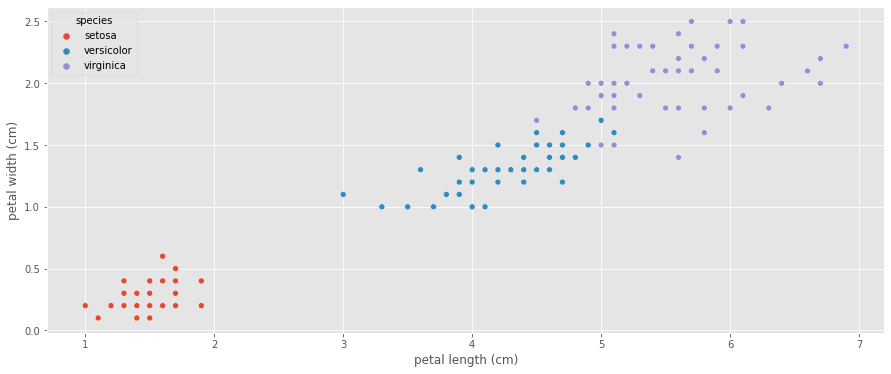

In [3]:
## scatterplots
sns.scatterplot(data = df_iris, x = "petal length (cm)", y = "petal width (cm)", hue = "species")
plt.show()

#### ***1.1***

Vamos a considerar solo el dataset con las features `petal length (cm)` y `petal width (cm)` para buscar realizar la clasificación.

In [4]:
X1, y = df_iris[["petal length (cm)","petal width (cm)"]], df_iris["species"]
tree_clf = DecisionTreeClassifier(max_depth=2, random_state = 123)
tree_clf.fit(X1,y)

DecisionTreeClassifier(max_depth=2, random_state=123)

Profundidad del árbol: 2



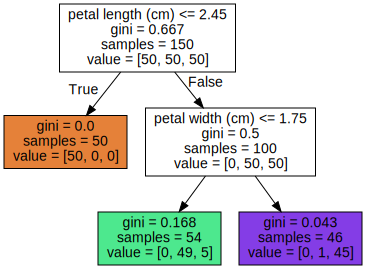

In [5]:
print(f"Profundidad del árbol: {tree_clf.get_depth()}\n")
##
dot_data = export_graphviz(tree_clf, feature_names=X1.columns, filled=True,)
Source(dot_data, format="png")

En el árbol anterior destancan tres elementos:

1. `samples`: Número de registros del set de train a los cuales se les aplica la regla.

2. `value`: Número de registros del set de train de cada clase en el nodo.

3. `gini`: Mide la impuereza del nodo.

Como un simple ejemplo consideremos el ***nodo izquierdo de profundidad 2.***. GINI será en este caso:

$$G_{\text{left_depth_2}}=1 – (0/54)^{2} – (49/54)^{2} – (5/54)^{2} ​​≈ 0,168$$

In [6]:
## Calculo de la probabilidad de clase
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [7]:
## Predict tipo de Iris
tree_clf.predict([[5, 1.5]])

array(['versicolor'], dtype=object)

#### ***1.2***

Vamos a tomar todas la features y veamos que sucede.

In [8]:
## Preparamos la data.
X, y = df_iris.drop(columns = ["species"]), df_iris["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=123,)

In [9]:
model_dt = DecisionTreeClassifier(max_depth = 3,       ## Profundidad del árbol
                                  criterion = "gini",  ## Criterio para la función de costo.
                                  random_state = 123)  ## Implantamos una semilla.

In [10]:
## Preparamos la data.
X, y = df_iris.drop(columns = ["species"]), df_iris["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [11]:
## Entrenamos el modelo
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

Profundidad del árbol: 3
Número de nodos terminales: 5


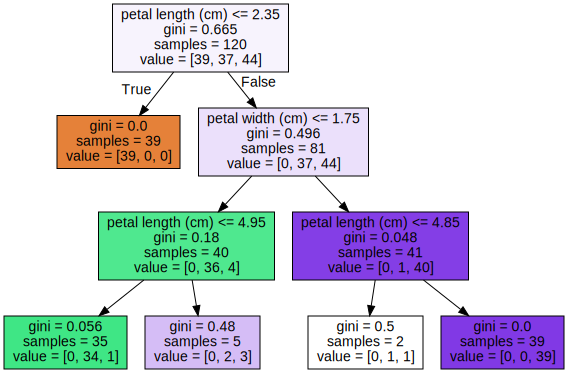

In [12]:
print(f"Profundidad del árbol: {model_dt.get_depth()}")
print(f"Número de nodos terminales: {model_dt.get_n_leaves()}")
##
dot_data = export_graphviz(model_dt, feature_names=X_train.columns, filled=True,)
Source(dot_data, format="png")

In [13]:
## Prediccion de las clases vía el modelo DecisionTree.
predict_class = model_dt.predict(X_test)

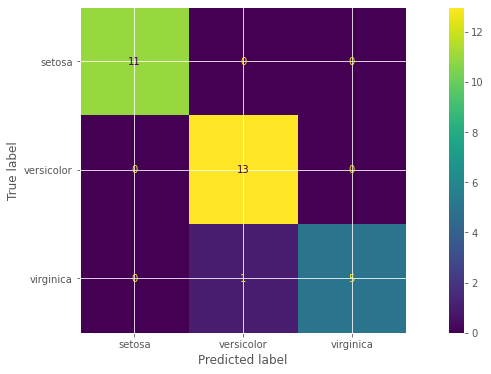

In [14]:
plot_confusion_matrix(model_dt, X_test, y_test);

In [15]:
accuracy = accuracy_score(y_test,predict_class)
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 96.66666666666667 %


## ***Nuevo modelo de predicción para los incumplimientos de préstamos de Lending Club***

## ***Introducción.***

Ya hemos inspeccionado lo que podemos hacer para determinar si un aspecto de la información personal (por ejemplo, si la información de ingresos está verificada) es importante al predecir el estado de incumplimiento. Este tipo de análisis ciertamente ayuda a simplificar el proceso de préstamo. Sin embargo, la pregunta más importante para todas las empresas de préstamos P2P, si un usuario incumplirá o no, aún no tiene respuesta. 

***Problema:***  Construir un modelo de clasificación para determinar si un usuario  pagará su préstamo o no.

La lectura tiene los siguientes pilares:

1. Generar 2 modelos de referencia.

2. Generar un modelo vía árboles de decisión.

3. Observar que aún tenemos limitantes para la elección de nuestro modelo final.

In [16]:
## Nuestra de Data de estudio.
df = pd.read_csv(url_base + "Logistic_Regression_1.csv",
                 dtype = {"loan_status":"category", "annual_inc":"float",
                          "verification_status":"category", "emp_length":"category",
                          "home_ownership":"category", "int_rate":"object",
                          "loan_amnt":"float", "purpose":"category",
                          "term":"category", "grade":"category"})
df["int_rate"] = df["int_rate"].str.rstrip("%").astype("float")
df.head()

loan_status  annual_inc verification_status emp_length home_ownership  \
0   Fully Paid     24000.0            Verified  10+ years           RENT   
1  Charged Off     30000.0     Source Verified   < 1 year           RENT   
2   Fully Paid     12252.0        Not Verified  10+ years           RENT   
3   Fully Paid     49200.0     Source Verified  10+ years           RENT   
4   Fully Paid     80000.0     Source Verified     1 year           RENT   

   int_rate  loan_amnt         purpose        term grade  
0     10.65     5000.0     credit_card   36 months     B  
1     15.27     2500.0             car   60 months     C  
2     15.96     2400.0  small_business   36 months     C  
3     13.49    10000.0           other   36 months     C  
4     12.69     3000.0           other   60 months     B

Antes de continuar, revisemos los resultados y el código de los modelos finales de las 2 lecturas anteriores.

In [17]:
## Ajustamos el modelo de regresión logística de la lectura anterior.
## Tenemos la data TOTAL en dos objetos. 1. X = variables explicativas. 2. y = Variable Target.
df_lr = df.copy()       
##
y = df_lr["loan_status"].cat.codes
X = df_lr.drop(columns = ["loan_status"])
X = pd.get_dummies(X, drop_first=True)
## Ajustamos el modelo de regresión logística de la lectura anterior. (Statsmodels).
X_sm = sm.add_constant(X)
model_sm = sm.Logit(y,X_sm).fit()
p_hat = model_sm.predict(X_sm)      ## Probalidades clase 1. (Fully Paid)
## AUC
fpr, tpr, thresholds = roc_curve(y, p_hat)
roc_auc = auc(fpr, tpr)
print("\nLogistic Regression ---> AUC={:.3f}".format(auc(fpr, tpr)))

Optimization terminated successfully.
         Current function value: 0.377925
         Iterations 7

Logistic Regression ---> AUC=0.691


In [18]:
############################ Naive-Bayes de la lectura anterior ##############################
df_nb = df.copy()
df_nb["annual_inc_log"] = np.log10(df_nb["annual_inc"])
df_nb["loan_amnt_sqrt"] = np.sqrt(df_nb["loan_amnt"])
probas = df_nb["loan_status"].value_counts(normalize = True)
proba_no_moroso, proba_moroso  = probas[0], probas[1]
###############################################################################################
label_encoder = LabelEncoder()
## Codificar las variables categóricas
for column in ["loan_status","verification_status","emp_length", "home_ownership","purpose",
               "term", "grade"]:
  df_nb[column] = label_encoder.fit_transform(df_nb[column])
## Ajustamos el modelo para variables continuas
gnb = GaussianNB()
Xcont = df_nb[["annual_inc_log","loan_amnt_sqrt","int_rate"]]
y = df_nb["loan_status"]
cont_probas = gnb.fit(Xcont, y).predict_proba(Xcont)    ## Probabilidades de cada registro.
## Ajustamos el modelo para variables categóricas
mnb = MultinomialNB()
Xcat = df_nb[["verification_status", "emp_length", "home_ownership","purpose","term","grade"]]
cat_probas = mnb.fit(Xcat, y).predict_proba(Xcat)       ## Probabilidades de cada registro.
## Probas de Naive-Bayes.
nb_probas = np.multiply(cont_probas, cat_probas)/np.array([proba_moroso, proba_no_moroso])
## Probas de la clase positiva.
df_nb["nb_predict_proba"] = nb_probas[:,1]
## AUC
fpr1, tpr1, thresholds = roc_curve(df_nb["loan_status"],df_nb['nb_predict_proba'])
roc_auc = auc(fpr1, tpr1)
print("Naive-Bayes ---> AUC={:.3f}".format(auc(fpr1, tpr1)))

Naive-Bayes ---> AUC=0.662


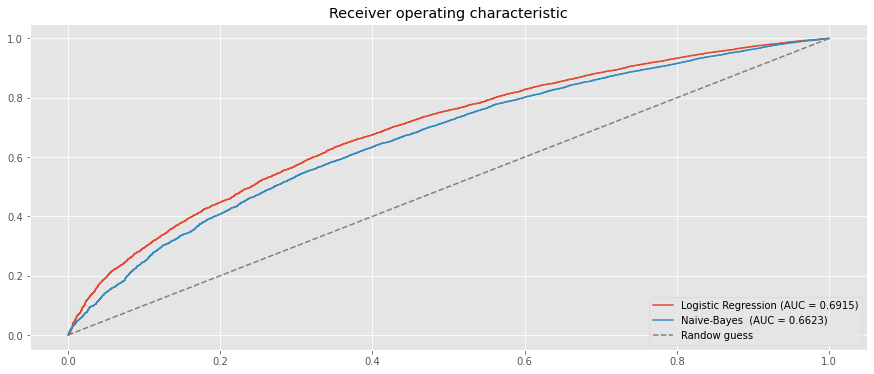

In [19]:
## Ambas curvas ROC.
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label = "Logistic Regression (AUC = {:.4f})".format(roc_auc),)
##
roc_auc1 = auc(fpr1, tpr1)
plt.plot(fpr1,tpr1,label = "Naive-Bayes  (AUC = {:.4f})".format(roc_auc1),)
##
plt.plot((0,1), (0,1), ls = "--", color = "grey", label = "Randow guess")
plt.legend(loc="lower right")
plt.title("Receiver operating characteristic")
plt.show()

### ***Ejemplo 2.***

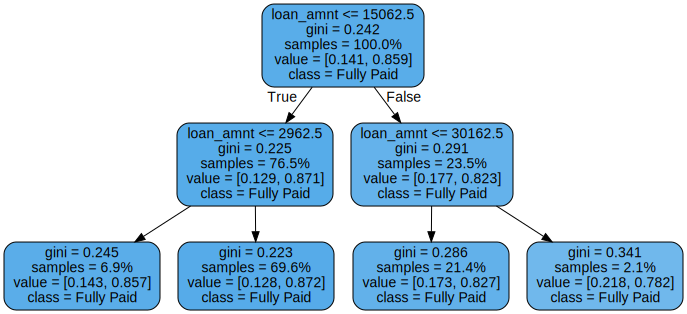

In [20]:
df_t = df.copy()
covariates = ["loan_amnt"]
## Variables codificadas como números.
clf = DecisionTreeClassifier(max_depth = 2, criterion = "gini")
clf = clf.fit(df_t[covariates], df_t["loan_status"])
##
dot_data = export_graphviz(clf, feature_names = covariates, filled = True, rounded=True,
                           class_names=["Charged Off", "Fully Paid"],proportion=True)
Source(dot_data, format="png")

#### ***Ejercicio 3:***

Suponga que tiene dos usuarios con `loan_amnt` igual a 10,000 y 100,000,000 respectivamente. ¿Cuál es el estado predecido de estos dos usuarios, utilizando el árbol de decisión anterior?

***Respuesta.*** 

1. Para el primer usuario, vamos a la izquierda, derecha y derecha. El nodo hoja contiene 2013 morosos y 13229 no-morosos. Entonces predecimos que este usuario no será un moroso.

2. Para el segundo usuario, vamos a la derecha, a la derecha y otra vez a la derecha. El resultado previsto para este usuario tampoco es moroso.

### ***Funcionamiento del algoritmo.***

Vamos a suponer que queremos crear un árbol de decisión que prediga `loan_status` basado en `term` y `verification_status`. Lo primero que debemos hacer es decidir qué nodo poner en la parte superior del árbol. Podemos hacer esto simplemente determinando cuál de `term` y `verification_status` hace un mejor trabajo al predecir `loan_status`.

Como ejemplo, imaginemos que el nodo superior en el árbol es `term<0,5` (es decir, si el cliente solicitó un préstamo con un plazo de `36 meses`). Idealmente, este sería un clasificador perfecto si todos los clientes que solicitaron un préstamo con un plazo de '36 meses' pagaron completamente su deuda y todos los clientes que no solicitaron un préstamo con un plazo de '36 meses' incumplieron. Claramente este no es el caso:

In [21]:
df_temp = df.copy()
df_temp["term"] = df_temp["term"].cat.codes
df_temp["loan_status"] = df_temp["loan_status"].cat.codes
df_temp["verification_status"] = df_temp["verification_status"].cat.codes
##
def get_ct(df_temp, col):
    ct_res = pd.crosstab(col, df_temp["loan_status"], margins=True)
    ct_res["Fully Paid(%)"] = ct_res[1]/ct_res["All"]
    return ct_res
##
get_ct(df_temp,df_temp["term"]<0.5)

loan_status     0      1    All  Fully Paid(%)
term                                          
False        2367   8054  10421       0.772862
True         3073  25211  28284       0.891352
All          5440  33265  38705       0.859450

Notemos que de todos los clientes que solicitaron un préstamo a plazo de '36 meses', el $89,1\%$ son no-morosos. Debido a que **no** todos los clientes eran morosos o no-morosos, decimos que este conjunto es ***impuro***. Por ejemplo, el conjunto de clientes que pidieron un préstamo a '60 meses' también es impuro ya que solo el $77.2\%$ de estos son no morosos. En lugar de encontrar una regla perfecta que aísle un conjunto puro, el objetivo principal del algoritmo es seleccionar una regla que minimice la impureza general de los conjuntos resultantes.

#### ***Ejercicio 4.***

Calcule la ***impureza de Gini*** y el valor de CART para `term<0.5` y `verification_status<1.5`.

Puede hacer uso del siguiente par de tablas cruzadas:

In [22]:
get_ct(df_temp,df_temp["term"]<0.5)

loan_status     0      1    All  Fully Paid(%)
term                                          
False        2367   8054  10421       0.772862
True         3073  25211  28284       0.891352
All          5440  33265  38705       0.859450

In [23]:
get_ct(df_temp,df_temp["verification_status"]<1.5)

loan_status             0      1    All  Fully Paid(%)
verification_status                                   
False                1977  10410  12387       0.840397
True                 3463  22855  26318       0.868417
All                  5440  33265  38705       0.859450

***Respuesta:***



Calculemos la impureza general de las decisiones `verification_status`<0.5 (es decir, clientes que están `No verificados`) y `fuente_verificada`<1.5 (es decir, clientes que están `No verificados` o `Fuente verificada`):

In [49]:
ct=get_ct(df_temp,df_temp['verification_status']<0.5)
GiniTrue=2*ct.loc[True,'Fully Paid(%)']*(1-ct.loc[True,'Fully Paid(%)'])
GiniFalse=2*ct.loc[False,'Fully Paid(%)']*(1-ct.loc[False,'Fully Paid(%)'])
CART=(ct.loc[True,'All']*GiniTrue+ct.loc[False,'All']*GiniFalse)/ct.loc['All','All']
print('Pureza general de `verification_status`<0.5 es ', CART)

Pureza general de `verification_status`<0.5 es  0.24119701857201067


In [51]:
ct=get_ct(df_temp,df_temp['verification_status']<1.5)
GiniTrue=2*ct.loc[True,'Fully Paid(%)']*(1-ct.loc[True,'Fully Paid(%)'])
GiniFalse=2*ct.loc[False,'Fully Paid(%)']*(1-ct.loc[False,'Fully Paid(%)'])
CART=(ct.loc[True,'All']*GiniTrue+ct.loc[False,'All']*GiniFalse)/ct.loc['All','All']
print('Pureza general de `verification_status`<1.5 es ', CART)

Pureza general de `verification_status`<1.5 es  0.241250148572477


Por lo tanto, la decisión que da el puntaje de impureza más bajo es `term<0.5` y este es el nodo desde el cual comenzamos nuestro árbol de decisión. Finalmente, repetimos este procedimiento con los subconjuntos subsiguientes determinados por la decisión `term<0.5` hasta que se haya alcanzado la profundidad deseada o todos los conjuntos subsiguientes tengan cero impurezas. En aras de la exhaustividad, podemos verificar nuestros hallazgos usando el clasificador de árbol de decisión `sklearn`:

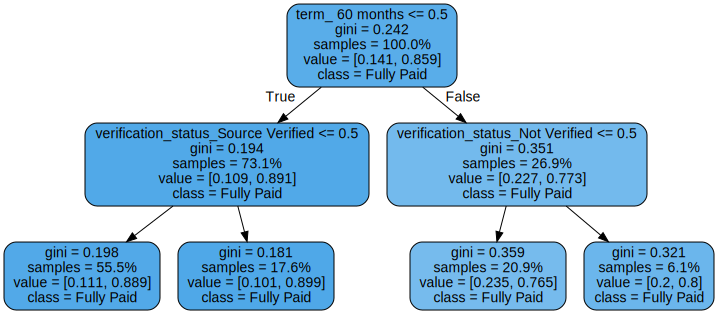

In [26]:
clf2 = DecisionTreeClassifier(max_depth = 2)
covariates = ["term","verification_status"]
X = pd.get_dummies(df_t[covariates],)
##
clf2 = clf2.fit(X, df_t["loan_status"])
## Ploteamos el árbol de decisión.
dot_data = export_graphviz(clf2, feature_names = X.columns, filled = True, rounded=True,
                           proportion=True, class_names=["Charged Off", "Fully Paid"],
                           impurity = "gini",)
Source(dot_data, format="jpg")

Podemos ver que el enfoque del árbol de decisiones no supone ninguna suposición sobre la relación entre el resultado y las covariables. Por lo tanto, es un algoritmo muy flexible que puede capturar una amplia gama de relaciones subyacentes entre el resultado y las covariables. Sin embargo, este algoritmo tiene muchos inconvenientes:

1. Debido a que es tan flexible, tiende a sobreajustarse. Cuando se aplica a un conjunto de validación independiente, el rendimiento suele disminuir significativamente. Este inconveniente realmente limita la aplicación de árboles de decisión.
2. Es difícil entrenar cuando el número de covariables es grande. En cada nodo interno, debe escanear una larga lista de posibles variables de división, lo que hace que el algoritmo sea complicado desde el punto de vista computacional. Sin embargo, este problema se ha mitigado con la potencia informática moderna.
3. Los árboles de decisión entrenados en el mismo conjunto de datos no siempre son los mismos. Este problema de inestabilidad ocurre porque es posible que el algoritmo no explore las covariables en el mismo orden cada vez. Como resultado, el árbol final puede variar mucho de una ejecución a otra.

#### ***Ejercicio 5:***

Use la función `train_test_split` del paquete `sklearn`, seleccione aleatoriamente el 75 % de la muestra en nuestro conjunto de datos y entrene un árbol de decisión en estas muestras con la covariable `annual_inc`. Evalúe la precisión del árbol en el conjunto de entrenamiento y las muestras que no están incluidas en el conjunto de entrenamiento. ¿Ve un cambio significativo en la puntuación de precisión?

In [27]:
loan_status = label_encoder.fit_transform(df['loan_status'])
##
X_train, X_test, y_train, y_test = train_test_split(df[['loan_amnt']], loan_status, 
                                                    test_size=0.25, random_state=1)
##
clf3 = DecisionTreeClassifier()
clf3 = clf3.fit(X_train, y_train)
##
y_pred_train = clf3.predict(X_train)
y_pred_test = clf3.predict(X_test)
##
print(f"Accuracy en Train: {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy en Test:  {accuracy_score(y_test, y_pred_test)}")

Accuracy en Train: 0.8617886178861789
Accuracy en Test:  0.8524336054562365


Podemos ver que la precisión cae 0.1 en las otras muestras. Esto parece indicar que el problema de sobreajuste de nuestro árbol de decisión particular no es demasiado grave. Pero debemos tener en cuenta que la prevalencia de los no morosos en el conjunto de datos es mucho mayor que la de los morosos. Esto podría inflar la precisión de un clasificador mediocre. (Para ver un ejemplo de esto, considere un clasificador ingenuo que etiqueta a todos como no morosos. Este clasificador tendría razón la gran mayoría de las veces, pero difícilmente lo consideraríamos un clasificador matizado).

### ***Límite de decisión de un árbol de decisión.***

El límite de decisión del árbol de decisión puede ser altamente no lineal. Por lo general, parece parches debido al hecho de que estamos dicotomizando el conjunto de datos en múltiples niveles. El siguiente es un ejemplo de un árbol construido con `annual_inc` y `loan_amnt`:

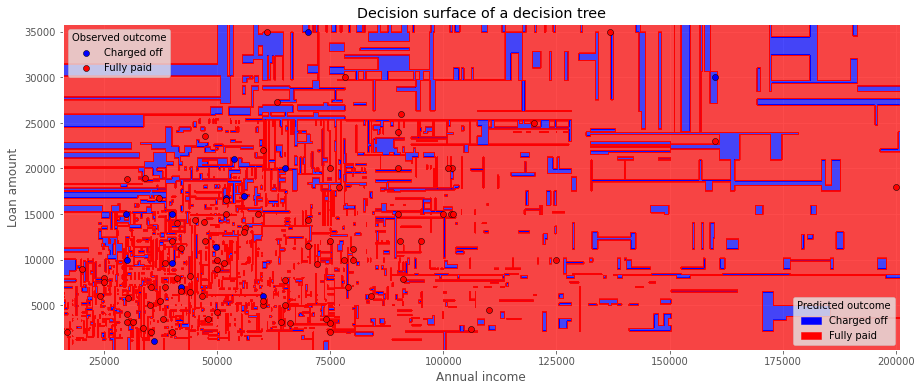

In [28]:
## Tomado de https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
n_classes = 2
plot_colors = 'br'
labels = ['Charged off', 'Fully paid']
clf = DecisionTreeClassifier().fit(df[['annual_inc', 'loan_amnt']], df['loan_status'].cat.codes)
# Plot the decision boundary
plot_step = 100
viridis = cm.get_cmap('viridis', 2)
newcolors = viridis(np.linspace(0, 1, 2))
blue = np.array([0, 0, 1, 1])
red = np.array([1, 0, 0, 1])
newcolors[0, :] = blue
newcolors[1, :] = red
newcmp = ListedColormap(newcolors)
###
np.random.seed(0)
idx_plot = np.random.choice(df.shape[0], 100, replace = False )
df_plot = df.iloc[idx_plot]

x_min, x_max = df_plot['annual_inc'].min() - 1000, df_plot['annual_inc'].max() + 1000
y_min, y_max = df_plot['loan_amnt'].min() - 1000, df_plot['loan_amnt'].max() + 1000
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

fig, ax = plt.subplots()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=newcmp, alpha = 0.7)

plt.xlabel('Annual income')
plt.ylabel('Loan amount')
plt.axis('tight');
##
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(df_plot['loan_status'].cat.codes == i)
    plt.scatter(df_plot.iloc[idx]['annual_inc'], df_plot.iloc[idx]['loan_amnt'], c=color, 
                label=labels[i], edgecolors='black')

legend_elements = [Patch(facecolor='blue', edgecolor='blue', label='Charged off'),
                   Patch(facecolor='red', edgecolor='red', label='Fully paid')]
##
plt.axis('tight')
plt.title('Decision surface of a decision tree')
leg1 = ax.legend(loc='upper left', title='Observed outcome')
ax.legend(handles=legend_elements, loc='lower right', title='Predicted outcome');
ax.add_artist(leg1);

In [29]:
## model final DecissionTree 10/11
df_tree = df.copy()
X = df_tree.drop(columns = ["loan_status"])
y = label_encoder.fit_transform(df_tree["loan_status"])
X = pd.get_dummies(X)
##
depth = 4
clf_tree = DecisionTreeClassifier(max_depth=depth)
clf_tree.fit(X,y)

DecisionTreeClassifier(max_depth=4)

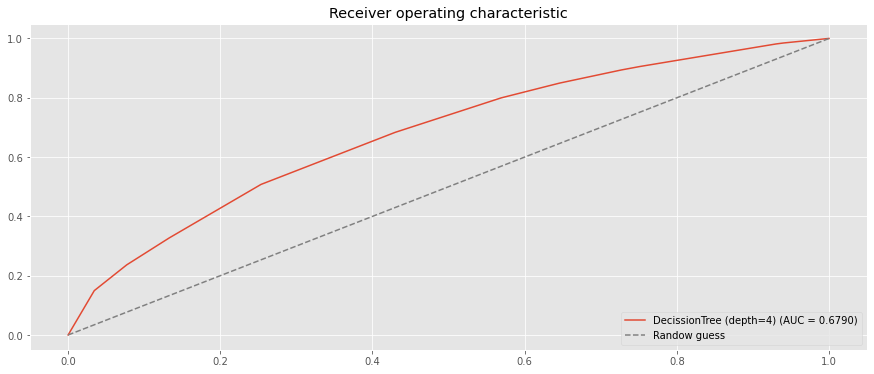

In [30]:
## Curva ROC modelo DecisionTree.
probas = clf_tree.predict_proba(X)[:,1]   ## Probabilidad de la categoría 1.
##
fpr, tpr, thresholds = roc_curve(y,probas)
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label = f'DecissionTree (depth={depth}) (AUC = {roc_auc:.4f})')
##
plt.plot((0,1), (0,1), ls = "--", color = "grey", label = "Randow guess")
plt.legend(loc="lower right")
plt.title("Receiver operating characteristic")
plt.show()

***¿Que sucede con la curva ROC, si cambiamos la profundidad del árbol?***

In [31]:
## DecisionTree model cambiando depth.
df_tree = df.copy()
X = df_tree.drop(columns = ["loan_status"])
y = df_tree["loan_status"]
##
X = pd.get_dummies(X)
y = label_encoder.fit_transform(y)
##
depth = 10
clf_tree_depth = DecisionTreeClassifier(max_depth=depth)
clf_tree_depth.fit(X,y)

DecisionTreeClassifier(max_depth=10)

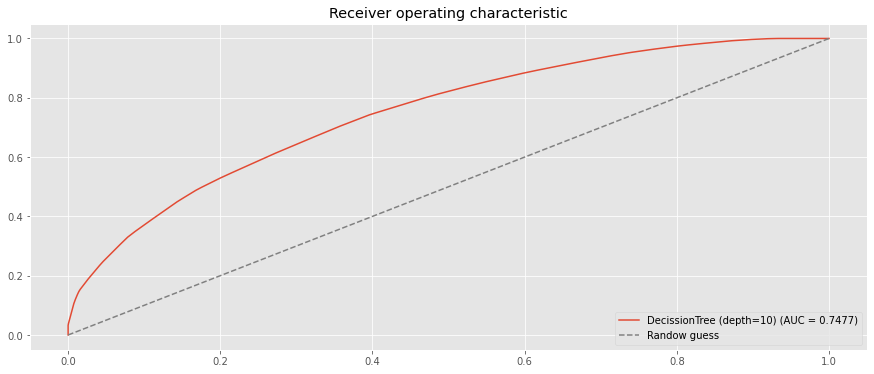

In [32]:
## Curva ROC modelo DecisionTree.
probas = clf_tree_depth.predict_proba(X)[:,1]   ## Probabilidad de la categoría 1.
##
fpr, tpr, thresholds = roc_curve(y,probas)
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,label = f'DecissionTree (depth={depth}) (AUC = {roc_auc:.4f})')
##
plt.plot((0,1), (0,1), ls = "--", color = "grey", label = "Randow guess")
plt.legend(loc="lower right")
plt.title("Receiver operating characteristic")
plt.show()

***¿Por qué esta mejora no es "real"?***

## ***Comparando los 3 modelos en el mismo Test y Train.***

### ***Naive-Bayes***

In [33]:
## Las variables deben entrar categóricas. X es pd.DatatFrame donde están las columnas de las 
## variables explicativas and y es la variable target.
def nb_classifier_proba(X, y, X_predict):
    #################################### Preparamos la Data ####################################
    X, y, X_predict = X.copy(), y.copy(), X_predict.copy()
    probas = y.value_counts(normalize = True)
    proba_no_moroso, proba_moroso  = probas[0], probas[1]
    X["annual_inc_log"] = np.log10(X["annual_inc"])
    X["loan_amnt_sqrt"] = np.sqrt(X["loan_amnt"])
    X_predict["annual_inc_log"] = np.log10(X_predict["annual_inc"])
    X_predict["loan_amnt_sqrt"] = np.sqrt(X_predict["loan_amnt"])
    ################################# Entrenamos el modelo ######################################
    label_encoder = LabelEncoder()
    for column in X.select_dtypes("category"):
        X[column] = label_encoder.fit_transform(X[column])    
    ### Ajustamos el modelo para variables continuas.
    gnb = GaussianNB()
    Xcont = X[["annual_inc_log","loan_amnt_sqrt","int_rate"]]
    fit_model_cont = gnb.fit(Xcont, y)    
    ## Ajustamos el modelo para variables categóricas.
    mnb = MultinomialNB()
    Xcat = X[["verification_status", "emp_length", "home_ownership","purpose","term","grade"]]
    fit_model_cat = mnb.fit(Xcat, y)
    ################################## predict del modelo  ######################################
    for column in X_predict.select_dtypes("category"):
        X_predict[column] = label_encoder.fit_transform(X_predict[column])
    Xcont_predict = X_predict[["annual_inc_log","loan_amnt_sqrt","int_rate"]]   
    Xcat_predict = X_predict[["verification_status", "emp_length", "home_ownership","purpose",
                              "term","grade"]]
    cont_probas = gnb.predict_proba(Xcont_predict)  
    cat_probas = mnb.predict_proba(Xcat_predict)
    proba_predict = np.multiply(cont_probas, cat_probas)/np.array([proba_moroso, proba_no_moroso])
    
    return proba_predict[:,1]

In [34]:
df_nb = df.copy()
X = df_nb.drop(columns = ["loan_status"])
y = df_nb["loan_status"]
##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify=y, random_state=123)
## AUC en Train
predict_proba_nb_train = nb_classifier_proba(X=X_train,y=y_train, X_predict=X_train)
roc_auc_nb_train = roc_auc_score(y_train, predict_proba_nb_train)
print(f'Naive-Bayes Train AUC = {roc_auc_nb_train:.4f}')

Naive-Bayes Train AUC = 0.6609


In [35]:
## AUC en Test
predict_proba_nb = nb_classifier_proba(X=X_train,y=y_train, X_predict=X_test)
roc_auc_nb_test = roc_auc_score(y_test, predict_proba_nb)
print(f'Naive-Bayes Test AUC = {roc_auc_nb_test:.4f}')

Naive-Bayes Test AUC = 0.6685


### ***Logistic regression.***

In [36]:
## Preparamos la data Logistic.
df_lr = df.copy()       
##
y = df_lr["loan_status"].cat.codes
X = df_lr.drop(columns = ["loan_status"])
X = pd.get_dummies(X, drop_first=True)
## Train y Test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify=y, random_state=123)

In [37]:
## Entrenamos Logistic Regression con sklearn.
model_lr = LogisticRegression(penalty = "none", solver = "newton-cg", fit_intercept=True)
model_lr.fit(X_train, y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [38]:
## AUC en Train.
predict_proba_lr_train = model_lr.predict_proba(X_train)[:,1]    ## Predict de la proba en X_train
roc_auc_lr_train = roc_auc_score(y_train, predict_proba_lr_train)
print(f'Logistic Regression Train AUC = {roc_auc_lr_train:.3f}')

Logistic Regression Train AUC = 0.692


In [39]:
## AUC en Test.
predict_proba_lr_test = model_lr.predict_proba(X_test)[:,1]     ## Predict de la proba en X_test
roc_auc_lr_test = roc_auc_score(y_test, predict_proba_lr_test)
print(f'Logistic Regression Test AUC = {roc_auc_lr_test:.3f}')

Logistic Regression Test AUC = 0.688


### ***Decision Tree.***

In [40]:
## Preparamos la data DecisionTree.
df_dt = df.copy()       
##
y = df_dt["loan_status"].cat.codes
X = df_dt.drop(columns = ["loan_status"])
X = pd.get_dummies(X)
## Train y Test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    stratify=y, random_state=123)

In [41]:
## model final DecissionTree
depth = 4
clf_tree = DecisionTreeClassifier(max_depth=depth)
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [42]:
## AUC en Train.
predict_proba_rf_train = clf_tree.predict_proba(X_train)[:,1]    ## Predict de la proba en X_train
roc_auc_rf_train = roc_auc_score(y_train, predict_proba_rf_train)
print(f'DecisionTree Train AUC = {roc_auc_rf_train:.3f}')

DecisionTree Train AUC = 0.675


In [43]:
## AUC en Test.
predict_proba_rf_test = clf_tree.predict_proba(X_test)[:,1]    ## Predict de la proba en X_test
roc_auc_rf_test = roc_auc_score(y_test, predict_proba_rf_test)
print(f'DecisionTree Test AUC = {roc_auc_rf_test:.3f}')

DecisionTree Test AUC = 0.669


## ***Búsqueda de parámetros DecisionTree.***

Vamos a hacer de [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para tratar de encontrar los parámetros óptimos.

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [44]:
base_estimator = DecisionTreeClassifier()
##
params = {"max_depth":[n for n in range(2,21)], "criterion":["gini","entropy"], 
          "min_samples_split" : [300 + 100*n for n in range(0,28)]}
###       
clf = GridSearchCV(base_estimator, params, scoring="roc_auc", cv = 5, n_jobs=-1)

In [45]:
search = clf.fit(X_train, y_train)
search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 1100}

### ***El "mejor" model***

In [46]:
best_model = DecisionTreeClassifier(criterion= "entropy", max_depth = 5, min_samples_split= 1100)
best_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=1100)

In [47]:
## AUC en Train.
proba_train = best_model.predict_proba(X_train)[:,1]    ## Predict de la proba en X_test
roc_auc_train = roc_auc_score(y_train, proba_train)
print(f'DecisionTree Test AUC = {roc_auc_train:.3f}')

DecisionTree Test AUC = 0.689


In [48]:
## AUC en Test.
predict_best_proba = best_model.predict_proba(X_test)[:,1]    ## Predict de la proba en X_test
roc_auc_best = roc_auc_score(y_test, predict_best_proba)
print(f'DecisionTree Test AUC = {roc_auc_best:.3f}')

DecisionTree Test AUC = 0.675
